In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df =pd.read_csv("foodtruck.csv")

In [7]:
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


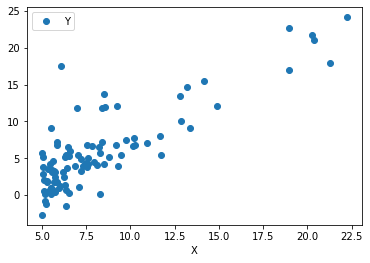

In [10]:
df.plot(x="X", y="Y", style="o")
plt.show()

In [12]:
x_mean = df["X"].mean()
y_mean = df["Y"].mean()
print(x_mean, y_mean)

8.159799999999999 5.839135051546393


In [36]:
df["x"] = df["X"] - x_mean
df["y"] = df["Y"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df[:10]


,X,Y,x,y,x*y,x^2,y^2,y_prediction
0,6.1101,17.5920,-2.0497,11.752865,-24.089847,4.201270,138.129834,3.393774
1,5.5277,9.1302,-2.6321,3.291065,-8.662412,6.927950,10.831108,2.698951
2,8.5186,13.6620,0.3588,7.822865,2.806844,0.128737,61.197216,6.267196
3,7.0032,11.8540,-1.1566,6.014865,-6.956793,1.337724,36.178600,4.459272
4,5.8598,6.8233,-2.3000,0.984165,-2.263579,5.290000,0.968581,3.095158
5,8.3829,11.8860,0.2231,6.046865,1.349056,0.049774,36.564576,6.105301
6,7.4764,4.3483,-0.6834,-1.490835,1.018837,0.467036,2.222589,5.023816
7,8.5781,12.0000,0.4183,6.160865,2.577090,0.174975,37.956257,6.338181
8,6.4862,6.5987,-1.6736,0.759565,-1.271208,2.800937,0.576939,3.842474
9,5.0546,3.8166,-3.1052,-2.022535,6.280376,9.642267,4.090648,2.134527


In [14]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

1715.2195285390003 1437.6958578599997 2914.8470516572247


In [15]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.8378732325263412

In [16]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [17]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

3.8498839959227156 5.48178525707763


In [18]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.1930336441895941

In [20]:
c = df["Y"].mean() - m * df["X"].mean()
c

-3.8957808783118555

In [37]:
df["y_prediction"] = m * df["X"] + c
df[:10]

,X,Y,x,y,x*y,x^2,y^2,y_prediction
0,6.1101,17.5920,-2.0497,11.752865,-24.089847,4.201270,138.129834,3.393774
1,5.5277,9.1302,-2.6321,3.291065,-8.662412,6.927950,10.831108,2.698951
2,8.5186,13.6620,0.3588,7.822865,2.806844,0.128737,61.197216,6.267196
3,7.0032,11.8540,-1.1566,6.014865,-6.956793,1.337724,36.178600,4.459272
4,5.8598,6.8233,-2.3000,0.984165,-2.263579,5.290000,0.968581,3.095158
5,8.3829,11.8860,0.2231,6.046865,1.349056,0.049774,36.564576,6.105301
6,7.4764,4.3483,-0.6834,-1.490835,1.018837,0.467036,2.222589,5.023816
7,8.5781,12.0000,0.4183,6.160865,2.577090,0.174975,37.956257,6.338181
8,6.4862,6.5987,-1.6736,0.759565,-1.271208,2.800937,0.576939,3.842474
9,5.0546,3.8166,-3.1052,-2.022535,6.280376,9.642267,4.090648,2.134527


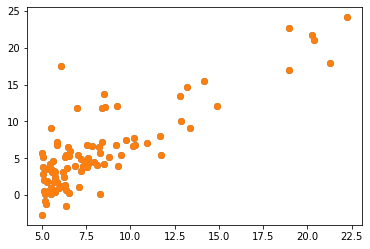

In [23]:
plot1 = plt.scatter(df["X"], df["Y"])
plot2 = plt.scatter(df["X"], df["Y"])
plt.show()

In [24]:
df["y_prediction"].mean()

5.8391350515463945

In [25]:
def getSSR(df_pred):
    result = 0
    for i in range(len(df_pred)):
        result += (df_pred[i] - df_pred.mean())**2
    return result

In [26]:
getSSR(df["y_prediction"])

2046.314604718041

In [27]:
def getSST(df_actual):
    result = 0
    for i in range(len(df_actual)):
        result += (df_actual[i] - df_actual.mean())**2
    return result

In [29]:
getSST(df["Y"])


2914.8470516572247

In [30]:
def getSSE(df_actual, df_pred):
    result = 0
    for i in range(len(df_actual)):
        result += (df_actual[i] - df_pred[i])**2
    return result

In [32]:
getSSE(df["Y"], df["y_prediction"])

868.5324469391846

In [33]:
r2 = correlation**2
r2


0.7020315537841402

In [35]:
r2 = getSSR(df["y_prediction"])/getSST(df["Y"])
r2

0.7020315537841401